In [1]:
# Installing Dataset from Kaggle 

! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yassin01","key":"a2426fa6b1469d3127c5060cfeee5473"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:02<00:00, 63.0MB/s]
100% 163M/163M [00:02<00:00, 60.2MB/s]


In [4]:
! unzip face-mask-dataset.zip 

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

In [5]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [6]:
root_dir = '/content/data'

class_names = ['with_mask', 'without_mask']

os.mkdir(os.path.join(root_dir, 'train'))
os.mkdir(os.path.join(root_dir, 'eval'))
os.mkdir(os.path.join(root_dir, 'test'))

In [7]:
# creating directories for train, validate and test 
for c in class_names:
  os.mkdir(os.path.join(root_dir, 'train', c))
  os.mkdir(os.path.join(root_dir, 'eval', c))
  os.mkdir(os.path.join(root_dir, 'test', c))

In [8]:
# filiing each directory with random images from root directory, 500 for each class in train, 100 for each class in evaluation, 50 for each class in test
for c in class_names:
  images = [x for x in os.listdir(os.path.join(root_dir, c))]
  selected_imges = random.sample(images, 500)
  for image in selected_imges:
    source_path = os.path.join(root_dir, c, image)
    target_path = os.path.join(root_dir, 'train', c, image)
    shutil.move(source_path, target_path)

for c in class_names:
  images = [x for x in os.listdir(os.path.join(root_dir, c))]
  selected_imges = random.sample(images, 100)
  for image in selected_imges:
    source_path = os.path.join(root_dir, c, image)
    target_path = os.path.join(root_dir, 'eval', c, image)
    shutil.move(source_path, target_path)

for c in class_names:
  images = [x for x in os.listdir(os.path.join(root_dir, c))]
  selected_imges = random.sample(images, 50)
  for image in selected_imges:
    source_path = os.path.join(root_dir, c, image)
    target_path = os.path.join(root_dir, 'test', c, image)
    shutil.move(source_path, target_path)

In [9]:
train_path = '/content/data/train'
validation_path = '/content/data/eval'
testing_path = '/content/data/test'

In [10]:
with_mask_training = len(os.listdir(os.path.join(train_path, 'with_mask')))
without_mask_training = len(os.listdir(os.path.join(train_path, 'without_mask')))

print(f'We have {with_mask_training} images with mask and {without_mask_training} images wihtout mask in the training data ')

We have 500 images with mask and 500 images wihtout mask in the training data 


In [11]:
with_mask_val = len(os.listdir(os.path.join(validation_path, 'with_mask')))
without_mask_val = len(os.listdir(os.path.join(validation_path, 'without_mask')))

print(f'We have {with_mask_val} images with mask and {without_mask_val} images wihtout mask in the validation data ')

We have 100 images with mask and 100 images wihtout mask in the validation data 


In [12]:
with_mask_testing = len(os.listdir(os.path.join(testing_path, 'with_mask')))
without_mask_testing = len(os.listdir(os.path.join(testing_path, 'without_mask')))

print(f'We have {with_mask_testing} images with mask and {without_mask_testing} images wihtout mask in the testing data ')

We have 50 images with mask and 50 images wihtout mask in the testing data 


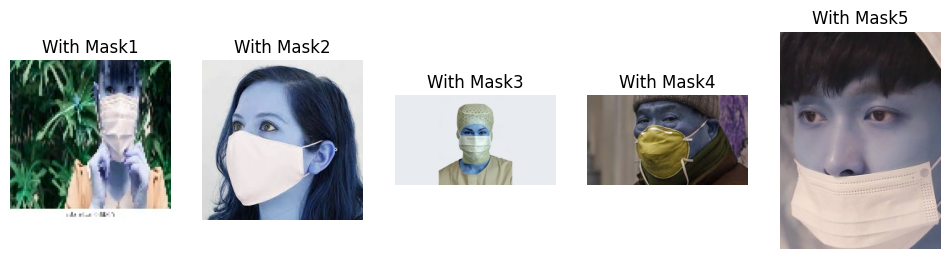

In [15]:
# showing some random images from with_mask class in train direectory 
all_images = os.listdir(os.path.join(train_path, 'with_mask'))
display_images = random.sample(all_images, 5)

fig = plt.figure(figsize=(12,10))

for index, image_name in enumerate(display_images):
  img_path = os.path.join(train_path, 'with_mask', image_name)
  img = cv2.imread(img_path)
  fig.add_subplot(1, 5, index+1)
  plt.imshow(img)
  plt.title(f'With Mask{index+1}')
  plt.axis("off")

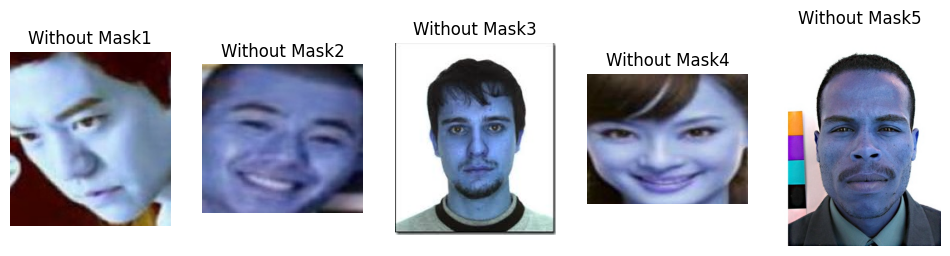

In [16]:
# showing some random images from without_mask class in train direectory 

all_images = os.listdir(os.path.join(train_path, 'without_mask'))
display_images = random.sample(all_images, 5)

fig = plt.figure(figsize=(12,10))

for index, image_name in enumerate(display_images):
  img_path = os.path.join(train_path, 'without_mask', image_name)
  img = cv2.imread(img_path)
  fig.add_subplot(1, 5, index+1)
  plt.imshow(img)
  plt.title(f'Without Mask{index+1}')
  plt.axis("off")

#Modeling

In [18]:
# Building the model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',padding='same', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, 'sigmoid')

])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)      

In [19]:
# load data from image generator 

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(128,128),
    classes= ['with_mask', 'without_mask'],
    class_mode='binary' )

val_generator = datagen.flow_from_directory(
    validation_path,
    target_size=(128,128),
    classes=['with_mask', 'without_mask'],
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [20]:
# compile and train the model 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_generator, epochs=9, validation_data=val_generator, verbose=1)

Epoch 1/9
32/32 [==============================] - 40s 1s/step - loss: 0.6842 - accuracy: 0.5670 - val_loss: 0.6928 - val_accuracy: 0.5200
Epoch 2/9
32/32 [==============================] - 34s 1s/step - loss: 0.4805 - accuracy: 0.7700 - val_loss: 0.4396 - val_accuracy: 0.8000
Epoch 3/9
32/32 [==============================] - 26s 802ms/step - loss: 0.3255 - accuracy: 0.8580 - val_loss: 0.3304 - val_accuracy: 0.8650
Epoch 4/9
32/32 [==============================] - 28s 875ms/step - loss: 0.2859 - accuracy: 0.8880 - val_loss: 0.3153 - val_accuracy: 0.8650
Epoch 5/9
32/32 [==============================] - 23s 731ms/step - loss: 0.2679 - accuracy: 0.8890 - val_loss: 0.2880 - val_accuracy: 0.8750
Epoch 6/9
32/32 [==============================] - 24s 762ms/step - loss: 0.2134 - accuracy: 0.9180 - val_loss: 0.2926 - val_accuracy: 0.8700
Epoch 7/9
32/32 [==============================] - 25s 800ms/step - loss: 0.1955 - accuracy: 0.9280 - val_loss: 0.2675 - val_accuracy: 0.8800
Epoch 8/9
32

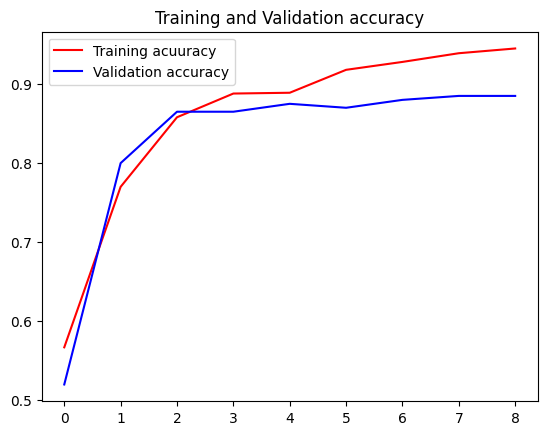

<Figure size 640x480 with 0 Axes>

In [21]:
# plot accuracy, Validation accuracy, loss and Validation loss for the model 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history. history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acuuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Training and Validation accuracy")
plt.legend(loc='upper left')
plt.figure()

plt.show()

In [24]:
test_generator = datagen.flow_from_directory(
    testing_path,
    target_size=(128,128),
    classes=['with_mask','without_mask'],
    class_mode='binary',
    shuffle=False
)

Found 100 images belonging to 2 classes.


In [26]:
# Evaluate the model on test data
model.evaluate(test_generator)

4/4 [==============================] - 1s 133ms/step - loss: 0.2150 - accuracy: 0.9200


[0.21499621868133545, 0.9200000166893005]

In [27]:
predictions = model.predict(test_generator)
predictions = predictions > 0.5
predictions = predictions.astype(int)

4/4 [==============================] - 1s 120ms/step


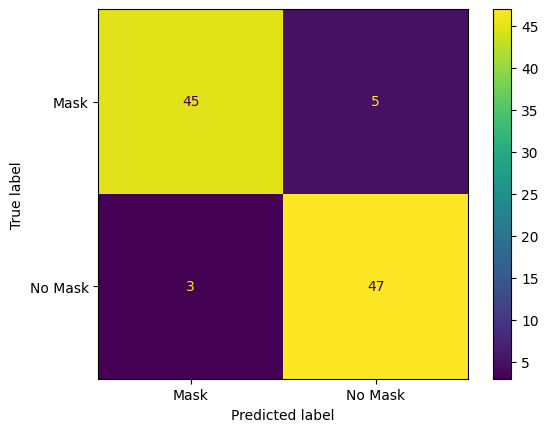

In [29]:
# lets see the confusion matrix 
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

cm = confusion_matrix(test_generator.classes, predictions)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Mask", "No Mask"]).plot()

## **Error Analysis**

1/1 [==============================] - 0s 27ms/step


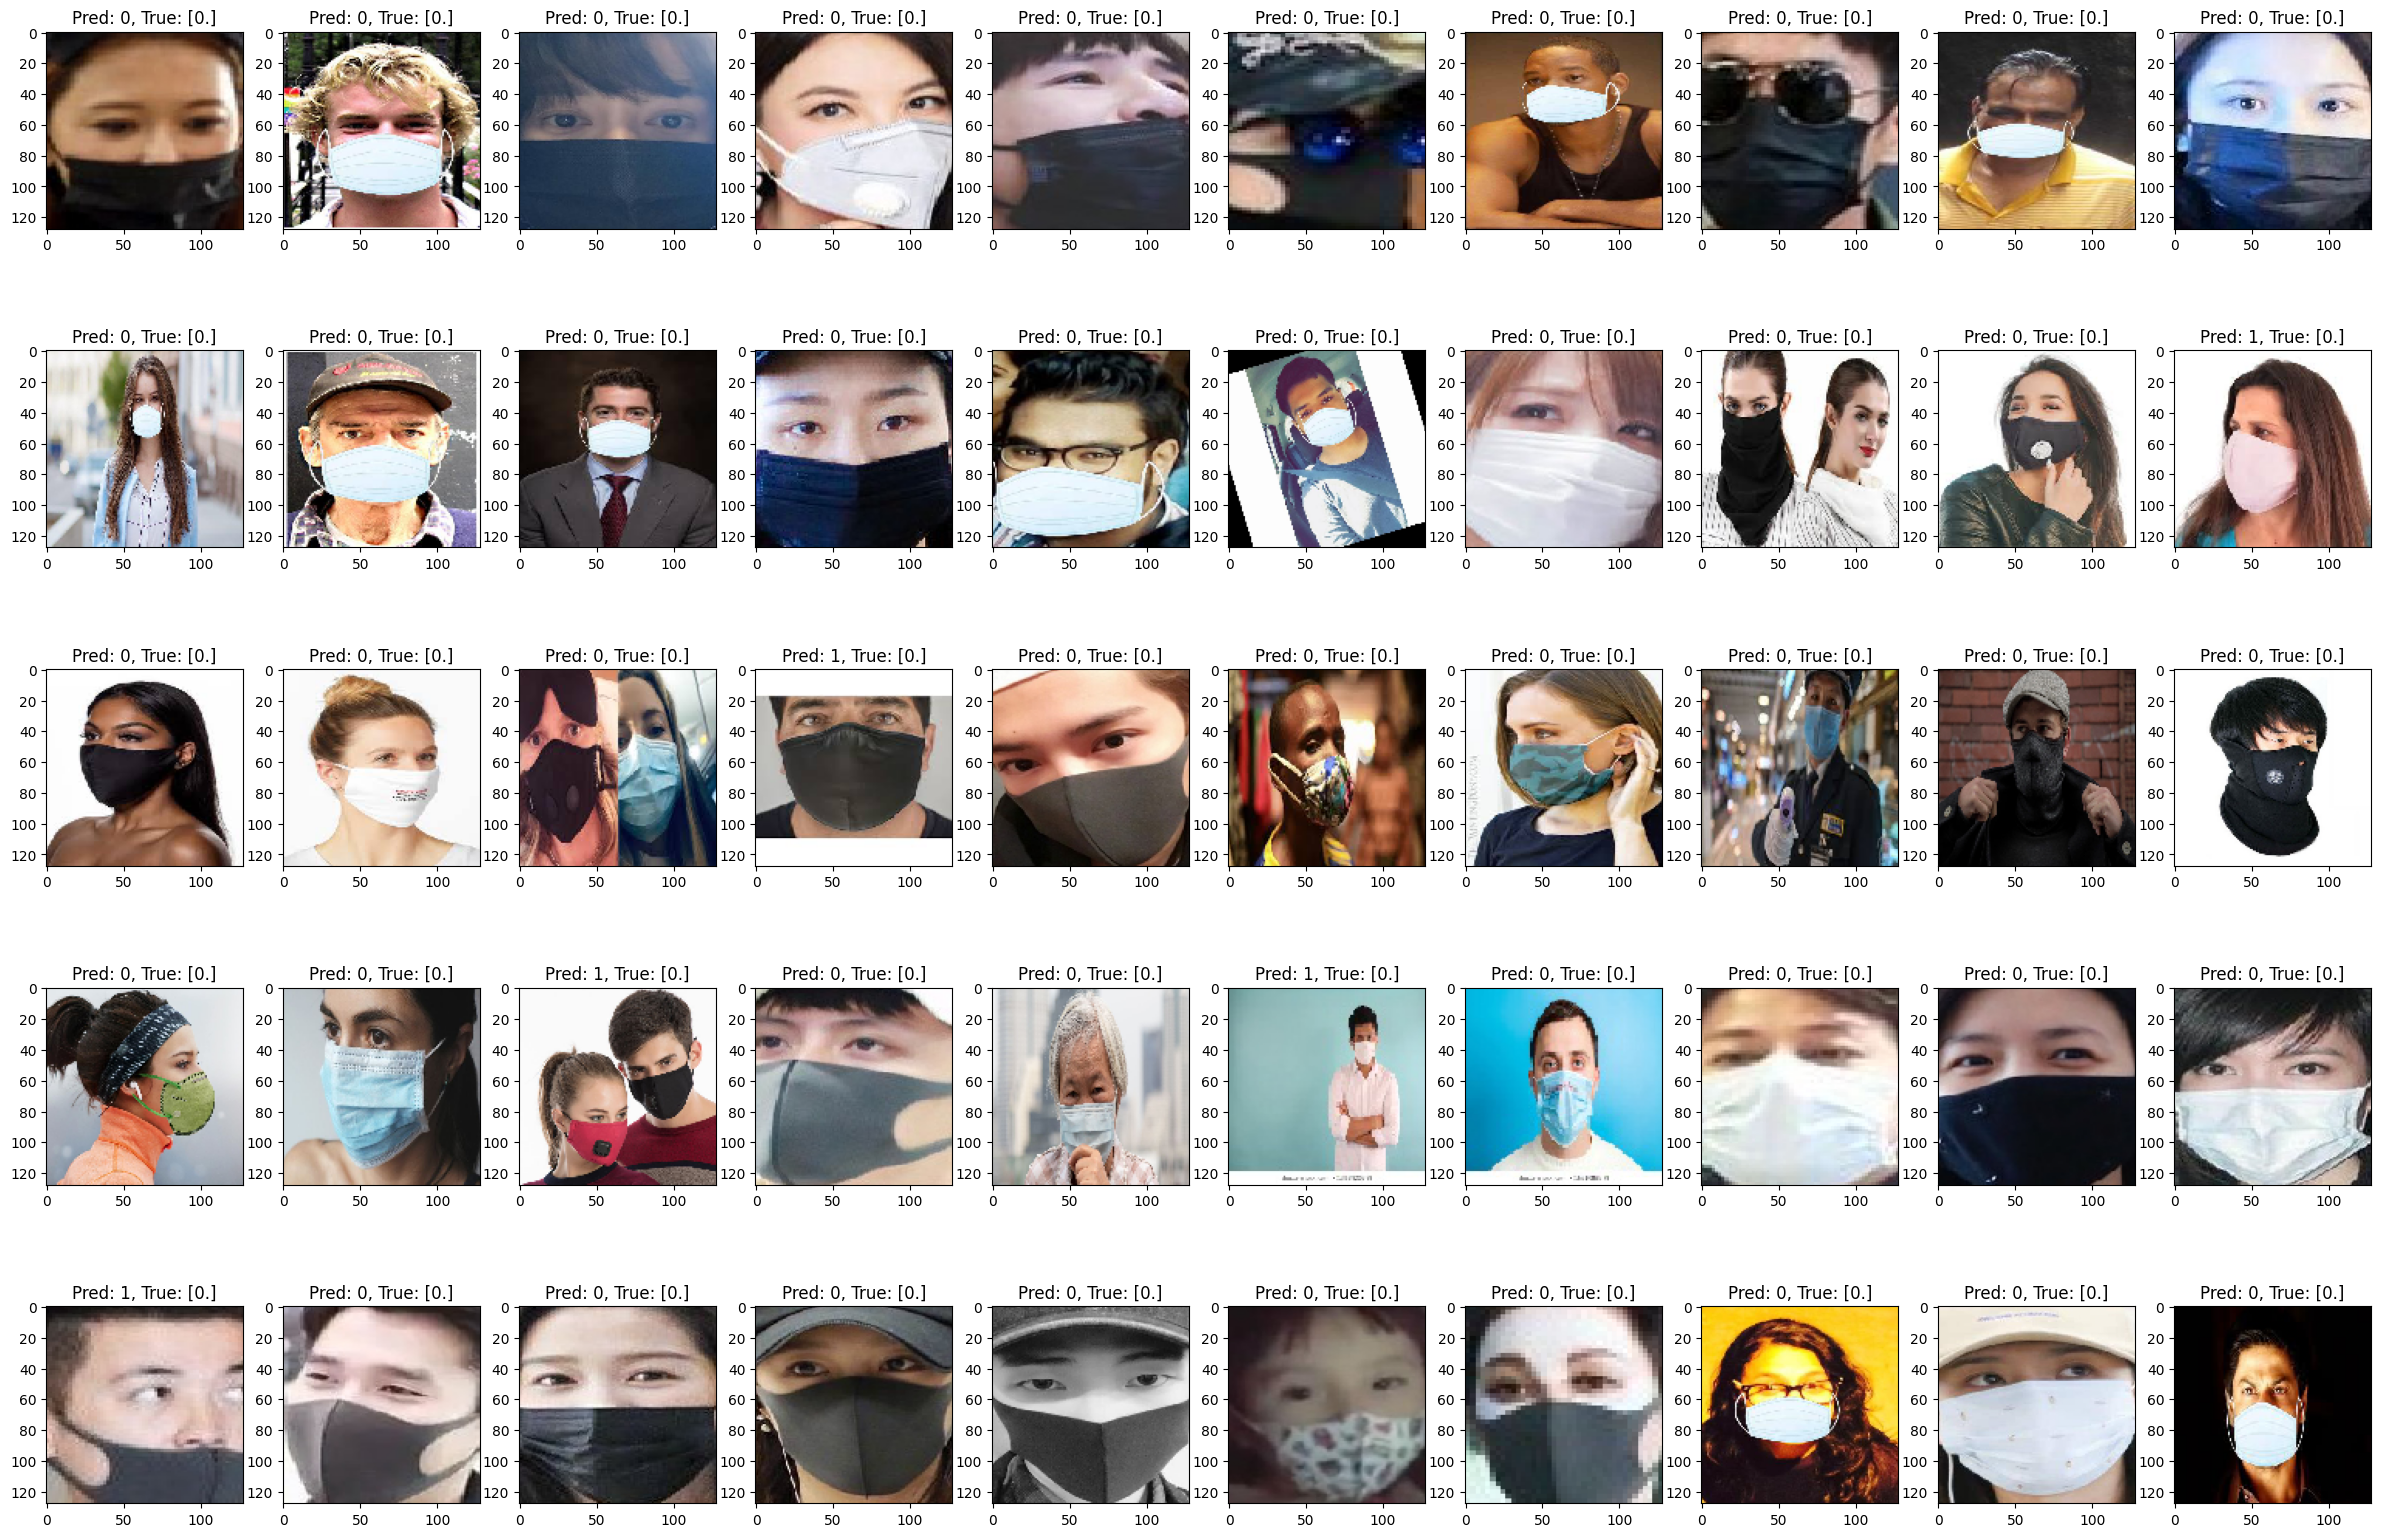

In [31]:
# How our model perform on each image of testset for with_mask class 
test_generator.reset()
test_generator.batch_size = 1
fig = plt.figure(figsize=(30,20))
for i in range(50):
  img = test_generator.next()
  prediction = int(model.predict(img[0])>0.5)

  fig.add_subplot(5, 10, i+1)
  plt.imshow(img[0][0])

  plt.title(f'Pred: {prediction}, True: {img[1]}')

1/1 [==============================] - 0s 29ms/step


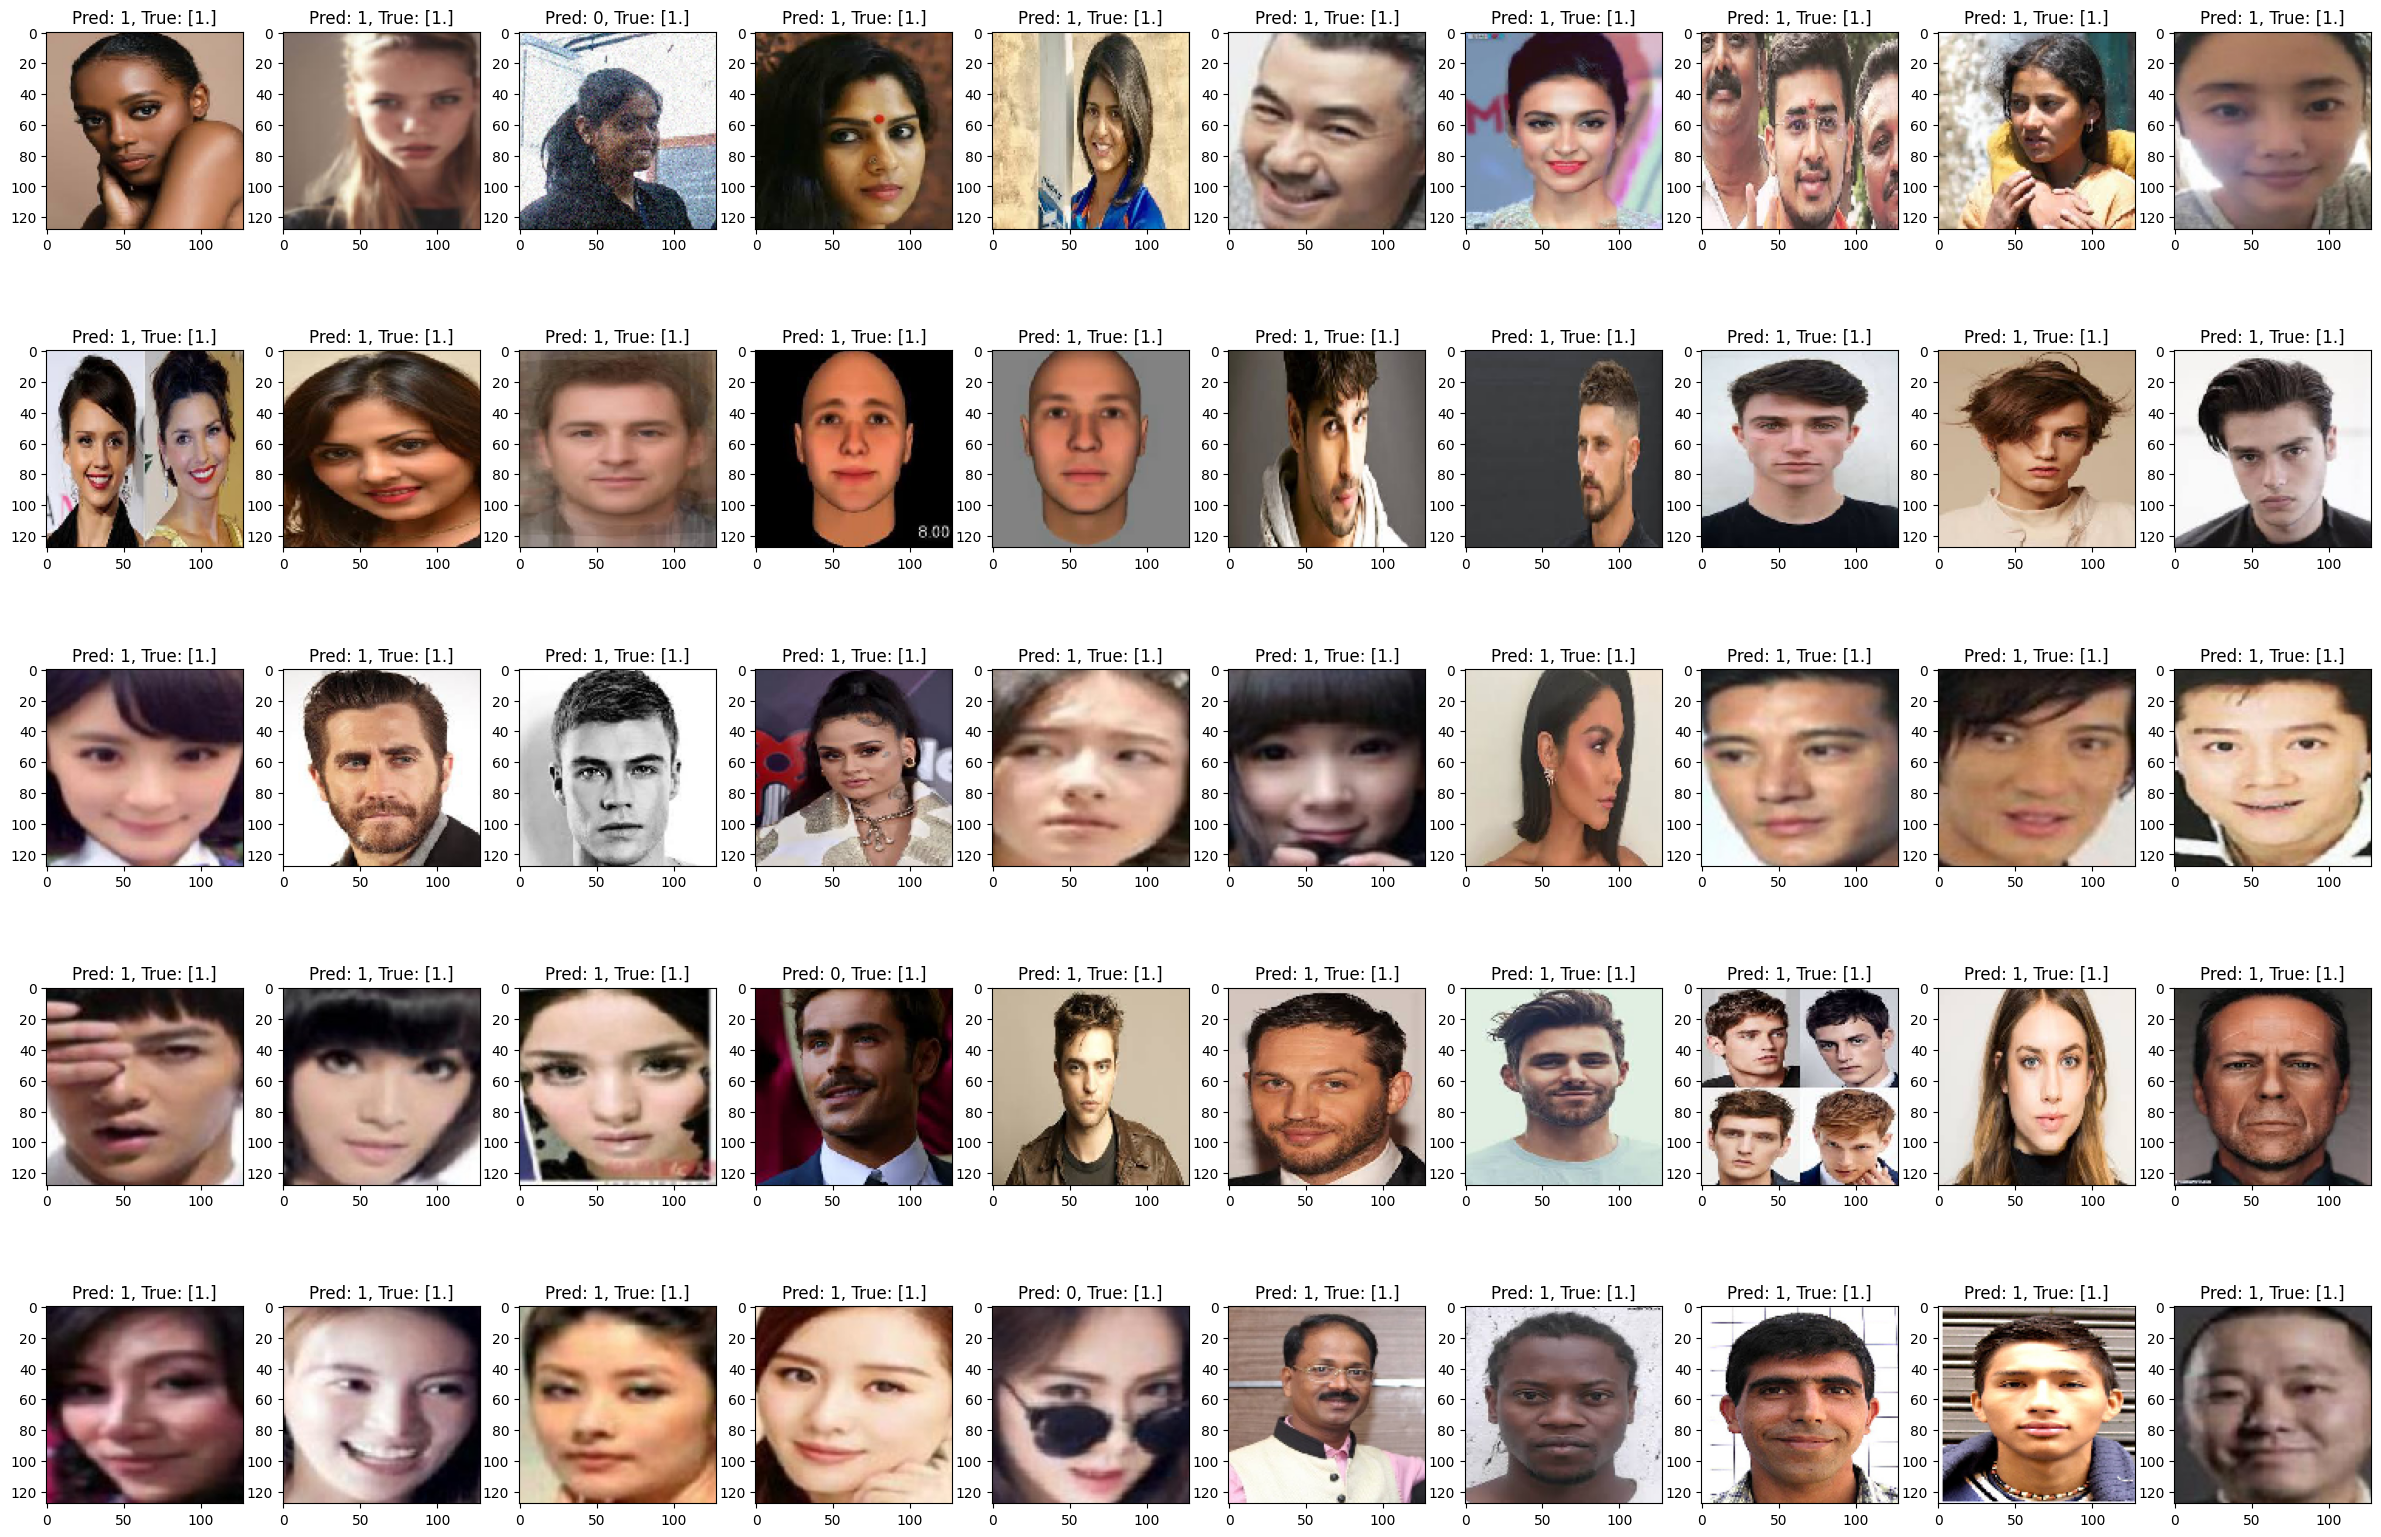

In [32]:
# How our model perform on each image of testset for without_mask class 

fig = plt.figure(figsize=(30,20))
for i in range(50):
  img = test_generator.next()
  prediction = int(model.predict(img[0])>0.5)

  fig.add_subplot(5, 10, i+1)
  plt.imshow(img[0][0])

  plt.title(f'Pred: {prediction}, True: {img[1]}')